In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df1=pd.read_csv('/content/drive/My Drive/sandeep/Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df1.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Species']= label_encoder.fit_transform(df1['Species'])
df1['Species'].unique()

array([0, 1, 2])

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual=   [1,1,0,1,0,0,1,0,0,0]
predicted=[1,0,0,1,0,0,1,1,1,0]
results=confusion_matrix(actual,predicted)
print(results)
print('Accuracy Score:',accuracy_score(actual,predicted))
print(classification_report(actual,predicted))

[[4 2]
 [1 3]]
Accuracy Score: 0.7
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [19]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
import pandas as pd
df1=pd.read_csv('/content/drive/My Drive/sandeep/Iris.csv')
df1.head()
data=df1.copy()

In [13]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

NameError: name 'plt' is not defined

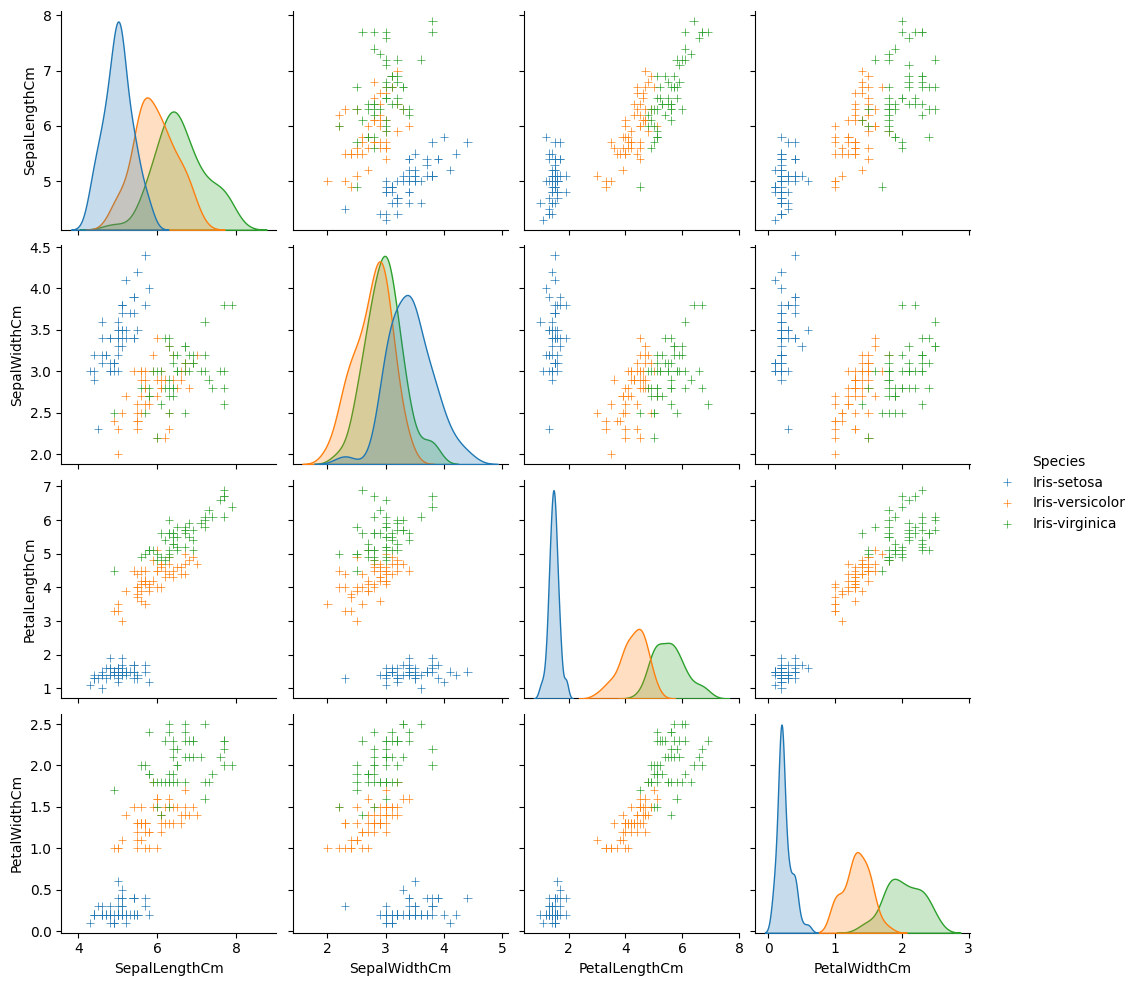

In [15]:
tmp=data.drop("Id",axis=1)
g=sns.pairplot(tmp,hue='Species',markers='+')
plt.show()

In [22]:
x=data.drop(['Id','Species'],axis=1)
y=data['Species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [23]:
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [26]:
x_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
147,6.5,3.0,5.2,2.0
104,6.5,3.0,5.8,2.2
52,6.9,3.1,4.9,1.5
22,4.6,3.6,1.0,0.2


In [27]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
147,6.5,3.0,5.2,2.0
104,6.5,3.0,5.8,2.2
52,6.9,3.1,4.9,1.5
22,4.6,3.6,1.0,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [28]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

knn.predict([[2.1,8.9,5.6,4.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

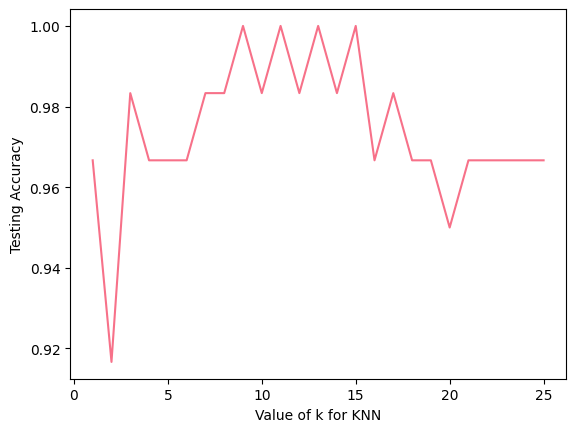

In [35]:
k_range=list(range(1,26))
scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [29]:
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9833333333333333


In [38]:
df1=pd.read_csv('/content/drive/My Drive/sandeep/diabetes.csv')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
790,10,101,76,48,180,32.9,0.171,63,0
791,2,122,70,27,0,36.8,0.340,27,0
792,5,121,72,23,112,26.2,0.245,30,0
793,1,126,60,0,0,30.1,0.349,47,1


In [39]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
x=df1.drop(['Pregnancies','BMI','DiabetesPedigreeFunction','Outcome'],axis=1)
y=df1['Outcome']
print(x.shape)
print(y.shape)

(795, 5)
(795,)


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(477, 5)
(477,)
(318, 5)
(318,)


In [45]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,Age
115,136,70,32,110,43
773,147,94,41,0,27
189,114,80,34,285,27
116,107,68,19,0,24
326,112,72,0,0,58
...,...,...,...,...,...
73,146,56,0,0,29
400,105,58,40,94,25
118,123,80,15,176,34
701,91,82,0,0,68


In [46]:
y_train

115    1
773    1
189    0
116    0
326    0
      ..
73     0
400    0
118    0
701    0
206    1
Name: Outcome, Length: 477, dtype: int64

In [48]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

knn.predict([[152,65,39,120,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])